# MNISTの画像分類

Googleドライブをマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/My Drive/KDDI関連/Creative.hack/勉強会/MNIST"

Mounted at /content/drive
/content/drive/My Drive/KDDI関連/Creative.hack/勉強会/MNIST


## 必要なライブラリの読み込み

In [2]:
import os
import pathlib

import numpy as np
import pandas as pd 
import tensorflow as tf
import tensorflow.keras.layers as layers

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## MNISTのダウンロード  
今回は外部のデータセットを使用するが、一般的には自分でデータセットを用意するケースが多い

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


MNISTのデータセットの一部を可視化

y_train (i=1):  0
X_train (i=1): 


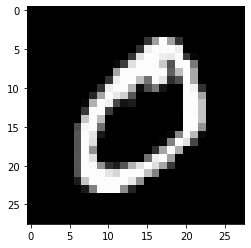

y_train (i=10):  3
X_train (i=10): 


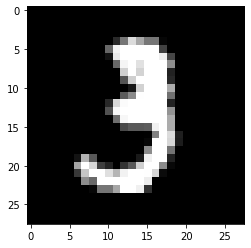

y_train (i=100):  5
X_train (i=100): 


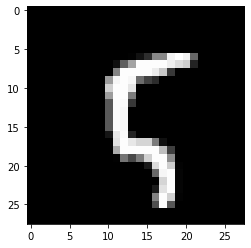

In [4]:
for i in [1,10,100]:
    print("y_train", "(i="+str(i)+"): ", y_train[i])
    print("X_train", "(i="+str(i)+"): ")    
    plt.imshow(X_train[i], cmap='gray')
    plt.show()

## 画像データの正規化
1. min-max normalization（正規化）  
  - 最小値が0, 最大値が1になるように変換する
  - x_new = (x - x_min) / (x_max - x_min)
2. z-score normalization（標準化）
  - 平均が0, 標準偏差が1になるよう変換する
  - x_new = (x - x_mean) / x_std


今回は入力データを標準化して学習を行う。

In [5]:
X_train, X_test = X_train/255.0, X_test/255.0
X_train, X_test = (X_train-0.5)/0.5, (X_test-0.5)/0.5

## モデルの作成
今回は全結合層3層によって構成される簡易的なモデルで学習を行う

In [6]:
class ClassificationModel(tf.keras.Model):
    def __init__(self):
        super(ClassificationModel, self).__init__()
        self.flatten_layer = layers.Flatten(input_shape=(28, 28), name='input')
        self.linear1 = layers.Dense(512, name='fc_1', activation='relu')
        self.linear2 = layers.Dense(256, name='fc_2', activation='relu')
        self.linear3 = layers.Dense(10, name='fc_2', activation='softmax')
        # self.relu = layers.Activation(tf.nn.relu, name='relu_1')

    def call(self, x):
        x = self.flatten_layer(x)
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        return x

model = ClassificationModel()

In [9]:
model

## 最適化関数＆損失関数の定義

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 学習のログの保存先の指定

In [11]:
CSV_FILE_PATH = './result/result_log.csv'
callbacks = []
callbacks.append(tf.keras.callbacks.CSVLogger(CSV_FILE_PATH))

## モデルの学習を実施

In [12]:
# Train model
history = model.fit(X_train, y_train, 
                    batch_size=100, 
                    epochs=30,
                    verbose=1, 
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)

Epoch 1/30
600/600 [==============================] - 9s 14ms/step - loss: 0.2748 - accuracy: 0.9155 - val_loss: 0.1397 - val_accuracy: 0.9557
Epoch 2/30
600/600 [==============================] - 6s 11ms/step - loss: 0.1269 - accuracy: 0.9602 - val_loss: 0.1072 - val_accuracy: 0.9675
Epoch 3/30
600/600 [==============================] - 7s 11ms/step - loss: 0.0956 - accuracy: 0.9695 - val_loss: 0.0909 - val_accuracy: 0.9716
Epoch 4/30
600/600 [==============================] - 8s 13ms/step - loss: 0.0779 - accuracy: 0.9749 - val_loss: 0.0879 - val_accuracy: 0.9722
Epoch 5/30
600/600 [==============================] - 7s 12ms/step - loss: 0.0656 - accuracy: 0.9786 - val_loss: 0.0810 - val_accuracy: 0.9746
Epoch 6/30
600/600 [==============================] - 7s 12ms/step - loss: 0.0567 - accuracy: 0.9820 - val_loss: 0.0807 - val_accuracy: 0.9755
Epoch 7/30
600/600 [==============================] - 7s 11ms/step - loss: 0.0503 - accuracy: 0.9839 - val_loss: 0.0830 - val_accuracy: 0.9759

## 学習モデルの評価

In [13]:
# Model evaluation
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=1)
print("loss(train): {:.4}".format(train_loss))
print("accuracy(train): {:.4}".format(train_acc))

print()

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("loss(test): {:.4}".format(test_loss))
print("accuracy(test): {:.4}".format(test_acc))

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0171 - accuracy: 0.9938
loss(train): 0.01713
accuracy(train): 0.9938

313/313 [==============================] - 1s 4ms/step - loss: 0.1376 - accuracy: 0.9758
loss(test): 0.1376
accuracy(test): 0.9758


In [14]:
df = pd.read_csv(CSV_FILE_PATH)
df.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.915467,0.274820,0.9557,0.139719
1,1,0.960233,0.126904,0.9675,0.107203
2,2,0.969500,0.095604,0.9716,0.090887
3,3,0.974900,0.077920,0.9722,0.087901
4,4,0.978617,0.065604,0.9746,0.080981


In [16]:
epochs = df["epoch"].values
train_acc = df["accuracy"].values
train_loss = df["loss"].values
test_acc = df["val_accuracy"].values
test_loss = df["val_loss"].values

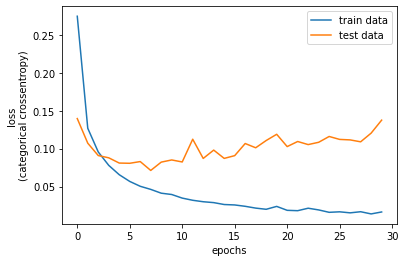

In [17]:
plt.plot(epochs, train_loss, label="train data")
plt.plot(epochs, test_loss, label="test data")
plt.xlabel("epochs")
plt.ylabel("loss\n(categorical crossentropy)")
plt.legend(loc="upper right")
plt.show()

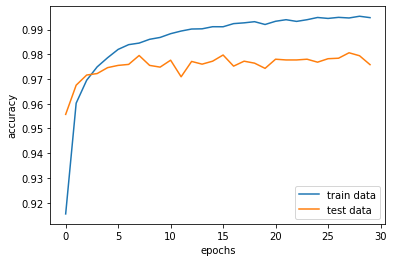

In [18]:
plt.plot(epochs, train_acc, label="train data")
plt.plot(epochs, test_acc, label="test data")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc="lower right")
plt.show()

## 学習したモデルの推論結果の可視化

y_test_pred (i=0):  7
y_test_true (i=0):  7
X_test (i=0): 


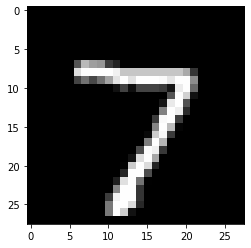

y_test_pred (i=1):  2
y_test_true (i=1):  2
X_test (i=1): 


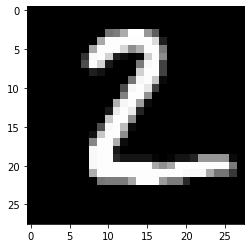

y_test_pred (i=2):  1
y_test_true (i=2):  1
X_test (i=2): 


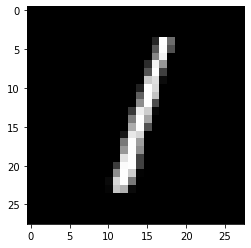

In [24]:
for i in [0,1,2]:
    y_true = y_test[i]
    y_pred = model(X_test[i].reshape(1,28,28))
    y_pred = np.array(y_pred)
    y_pred = np.argmax(y_pred)
    print("y_test_pred", "(i="+str(i)+"): ", y_pred)
    print("y_test_true", "(i="+str(i)+"): ", y_true)
    print("X_test", "(i="+str(i)+"): ")    
    plt.imshow(X_test[i], cmap='gray')
    plt.show()

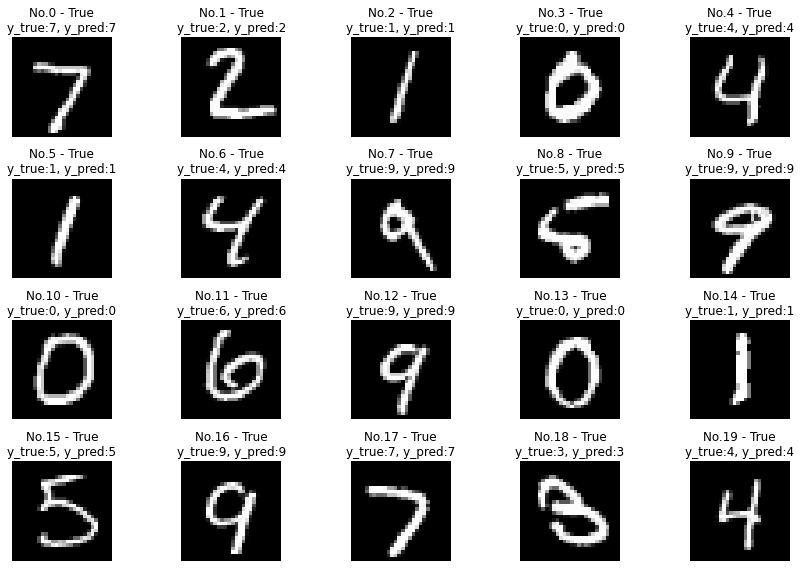

In [25]:
fig = plt.figure(figsize=(12, 8))

ROW = 4
COLUMN = 5

for i in range(ROW * COLUMN):
    y_true = y_test[i]
    y_pred = model(X_test[i].reshape(1,28,28))
    y_pred = np.array(y_pred)
    y_pred = np.argmax(y_pred)
    
    if y_true == y_pred:
        result = "True"
    else:
        result = "False" 
    
    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title("No.{} - {}\ny_true:{}, y_pred:{}".format(i, result, y_true, y_pred))
    plt.axis("off")

fig.tight_layout()
fig.show()

## 学習モデルの保存

In [27]:
model.save('./weights/learning_model.pkl')